<a href="https://colab.research.google.com/github/madhumitafilos/Collab/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Feature Engineering**

**1.Import required libraries**

In [47]:
# numerical library:
import numpy as np

# data manipulation library:
import pandas as pd

# to split data to training and validation dataset
from sklearn.model_selection import train_test_split

# linear regression model
from sklearn.linear_model import LinearRegression

#Metrics
from sklearn import metrics

#Creation of Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

#Random forest
from sklearn.ensemble import RandomForestRegressor

**2.Read/Extract data**

In [48]:
wind_DS = pd.read_csv('/content/drive/MyDrive/training_data.csv')
wind_DS.head()

,active_power,timestamp,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,...,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h
0,801.22998,2013-01-01 00:00:00,-1.0,67.559998,286.00000,20.129999,7.52,7.76,7.64,286.19000,...,5.44,16.950001,26.049999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
1,943.16998,2013-01-01 00:10:00,-1.0,70.260002,286.00000,21.420000,8.18,8.45,8.31,288.32999,...,5.74,17.139999,26.100000,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
2,998.48999,2013-01-01 00:20:00,-1.0,75.330002,286.00000,22.049999,8.29,8.66,8.47,293.04001,...,6.09,17.150000,26.219999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
3,837.96002,2013-01-01 00:30:00,-1.0,82.739998,286.00000,22.299999,7.89,8.24,8.06,294.01999,...,6.35,16.910000,26.309999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
4,871.57001,2013-01-01 00:40:00,-1.0,82.349998,294.17999,22.600000,7.86,8.20,8.03,299.22000,...,6.51,16.920000,26.389999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0


In [ ]:
# Check the number of rows and columns in the data
wind_DS.shape

(208910, 21)

In [ ]:
# Check the type of data stored in each column
wind_DS.dtypes

active_power              float64
timestamp                  object
pitch_angle               float64
reactive_power            float64
nacelle_angle             float64
nacelle_temp              float64
wind_speed1               float64
wind_speed2               float64
wind_speed_avg            float64
wind_angle                float64
vane_angle                float64
outdoor_temp              float64
rotor_angular_velocity    float64
rotor_bearing_temp        float64
weather_temp              float64
pressure                  float64
humidity                  float64
weather_wind_speed        float64
weather_wind_angle        float64
rain_1h                   float64
snow_1h                   float64
dtype: object

We have all numerical data in the table except the timestamp.

In [ ]:
# Look at the general distribution of these features
wind_DS.describe()

,active_power,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,vane_angle,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h
count,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.00000,208910.000000,208910.000000,208910.000000,208910.000000
mean,333.816039,10.598804,31.602240,181.410901,25.247184,5.245032,5.309963,5.277553,179.518056,0.214923,12.165809,10.363781,26.975262,10.860165,1016.981739,79.06385,3.460041,170.338730,0.060069,0.001185
std,427.064175,23.263701,31.392095,96.000942,6.371956,2.606739,2.478537,2.535224,95.235185,24.305192,7.542306,5.578950,5.256221,7.475077,8.296634,18.04730,2.132537,100.778006,0.299763,0.031198
min,-18.490000,-121.260000,-165.550000,0.030000,1.560000,0.000000,0.000000,0.000000,0.000000,-179.950000,-6.320000,0.000000,4.600000,-9.310000,976.000000,14.00000,0.130000,0.000000,0.000000,0.000000
25%,24.459999,-0.990000,9.600000,100.120000,21.219999,3.790000,3.930000,3.860000,98.542502,-5.930000,6.220000,9.229999,24.280001,5.150000,1012.000000,68.00000,2.060000,80.000000,0.000000,0.000000
50%,170.530000,-0.990000,26.850000,197.810000,25.770000,5.290000,5.350000,5.320000,194.600010,-0.140000,11.810000,11.250000,27.500000,10.420000,1017.000000,86.00000,3.090000,190.000000,0.000000,0.000000
75%,467.130000,0.500000,40.610001,251.590000,29.730000,6.620000,6.640000,6.630000,248.100010,6.100000,17.400000,14.860000,30.400000,15.970000,1022.000000,93.00000,4.630000,240.000000,0.000000,0.000000
max,2051.120100,119.070000,241.700000,359.959990,42.849998,21.280001,19.990000,20.570000,360.000000,180.000000,37.779999,17.219999,41.049999,35.940000,1044.000000,100.00000,19.030000,360.000000,8.060000,2.080000


Observations:


*   active_power has negative values
*   pitch_angle has negative values and 50% of the data has negative values
*   reactive_power has negative values
*   vane_angle has negative values and 50% of the data has negative values





In [ ]:
#Describe the features when active_power is 0
wind_DS[wind_DS['active_power'] > 0].describe()

,active_power,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,vane_angle,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h
count,165262.000000,165262.000000,165262.000000,165262.000000,165262.000000,165262.000000,165262.000000,165262.000000,165262.000000,165262.000000,165262.000000,165262.000000,165262.000000,165262.000000,165262.000000,165262.000000,165262.000000,165262.000000,165262.000000,165262.000000
mean,422.225867,-0.125008,39.838750,181.811109,25.349659,6.148806,6.174195,6.161568,181.556170,0.020834,11.819723,12.841845,27.838075,10.713285,1016.607417,79.186673,3.861392,177.502790,0.064621,0.001233
std,439.479886,4.405103,30.295541,93.573864,6.130985,2.033700,1.912422,1.968950,93.493282,7.771591,7.289707,3.021600,4.532250,7.249108,8.350409,17.609041,2.160632,96.038141,0.304090,0.031992
min,0.010000,-1.020000,-165.550000,0.030000,2.790000,0.000000,0.000000,0.000000,0.000000,-69.720001,-6.320000,0.410000,4.600000,-9.310000,976.000000,14.000000,0.180000,0.000000,0.000000,0.000000
25%,108.200000,-0.990000,22.730000,114.780000,21.520000,4.800000,4.890000,4.850000,114.020000,-5.110000,6.150000,10.150000,25.200001,5.210000,1012.000000,68.000000,2.100000,90.000000,0.000000,0.000000
50%,263.920010,-0.990000,31.430000,200.000000,25.840000,5.780000,5.820000,5.800000,199.520000,-0.240000,11.340000,12.620000,28.010000,10.220000,1017.000000,86.000000,3.600000,200.000000,0.000000,0.000000
75%,577.817507,-0.860000,45.980000,247.200000,29.660000,7.010000,7.000000,7.000000,246.157498,4.980000,16.860001,15.730000,30.860001,15.650000,1022.000000,93.000000,5.100000,240.000000,0.000000,0.000000
max,2051.120100,89.529999,241.700000,359.959990,42.840000,21.280001,19.990000,20.570000,360.000000,81.040001,37.150002,17.219999,41.049999,35.940000,1044.000000,100.000000,19.030000,360.000000,8.060000,2.080000


Observations:



*   When active_power is below 0, reactive power is also more than 75% of time equal to 0
*   When active_power is below 0, windspeed is also very less. Windspeed seems to be a driving factor for the power generation.

In [ ]:
# Look at the correlation matrix
wind_DS.corr()

<ipython-input-7-7f5cad7fb1ab>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wind_DS.corr()


,active_power,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,vane_angle,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h
active_power,1.000000,-0.363420,0.900180,0.053041,-0.345155,0.886183,0.883143,0.887270,0.068155,-0.011258,-0.177630,0.718239,0.181216,-0.109827,-0.163830,0.006019,0.745152,0.106740,0.086805,0.028852
pitch_angle,-0.363420,1.000000,-0.464738,-0.016507,-0.086762,-0.594993,-0.592708,-0.595640,-0.038262,0.012079,0.061149,-0.837821,-0.356441,0.021009,0.068698,-0.005805,-0.313563,-0.130372,-0.022527,0.004991
reactive_power,0.900180,-0.464738,1.000000,0.036307,-0.279224,0.859482,0.860295,0.862402,0.054024,-0.010411,-0.149803,0.727273,0.210268,-0.086524,-0.141388,-0.002745,0.689760,0.105614,0.086951,0.022997
nacelle_angle,0.053041,-0.016507,0.036307,1.000000,0.001861,0.055790,0.049704,0.052973,0.813396,-0.033786,0.001469,0.030701,0.049792,0.041375,-0.095769,0.102921,0.117209,0.499405,0.074536,0.007632
nacelle_temp,-0.345155,-0.086762,-0.279224,0.001861,1.000000,-0.184557,-0.221878,-0.203356,-0.005688,0.012779,0.692833,-0.089565,0.609419,0.659313,0.045099,-0.388600,-0.225378,0.000722,-0.002999,-0.044996
wind_speed1,0.886183,-0.594993,0.859482,0.055790,-0.184557,1.000000,0.988430,0.997225,0.083091,-0.035162,-0.099085,0.872430,0.323676,-0.023797,-0.174267,-0.036160,0.730740,0.157394,0.085564,0.014896
wind_speed2,0.883143,-0.592708,0.860295,0.049704,-0.221878,0.988430,1.000000,0.996958,0.081378,0.004707,-0.153547,0.875842,0.275425,-0.073901,-0.183527,-0.011197,0.730278,0.154324,0.085266,0.026397
wind_speed_avg,0.887270,-0.595640,0.862402,0.052973,-0.203356,0.997225,0.996958,1.000000,0.082483,-0.015764,-0.126034,0.876649,0.301009,-0.048391,-0.179269,-0.024044,0.732634,0.156356,0.085662,0.020559
wind_angle,0.068155,-0.038262,0.054024,0.813396,-0.005688,0.083091,0.081378,0.082483,1.000000,-0.029853,-0.005359,0.061536,0.045595,0.040636,-0.094534,0.091956,0.137358,0.502829,0.075703,0.010114
vane_angle,-0.011258,0.012079,-0.010411,-0.033786,0.012779,-0.035162,0.004707,-0.015764,-0.029853,1.000000,0.014783,-0.014809,0.010712,0.011591,0.022213,-0.007365,-0.019330,-0.008985,-0.007422,0.005255


In [ ]:
#Detect Outliers
def detect_outlier(feature):
    outliers = []
    data = wind_DS[feature]
    mean = np.mean(data)
    std =np.std(data)


    for y in data:
        z_score= (y - mean)/std
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))

In [ ]:
# Determine what the upperbound should be for continuous features
for feat in ['pitch_angle','reactive_power','nacelle_angle','nacelle_temp','wind_speed1','wind_speed2','wind_speed_avg','wind_angle','vane_angle','outdoor_temp','rotor_angular_velocity','rotor_bearing_temp','weather_temp','pressure','humidity','weather_wind_speed','weather_wind_angle','rain_1h','snow_1h']:
    detect_outlier(feat)


Outlier caps for pitch_angle:
  --95p: 45.0 / 8791 values exceed that
  --3sd: 80.4 / 8069 values exceed that
  --99p: 90.0 / 1518 values exceed that

Outlier caps for reactive_power:
  --95p: 95.6 / 10446 values exceed that
  --3sd: 125.8 / 5319 values exceed that
  --99p: 156.3 / 2089 values exceed that

Outlier caps for nacelle_angle:
  --95p: 329.5 / 10434 values exceed that
  --3sd: 469.4 / 0 values exceed that
  --99p: 354.8 / 1950 values exceed that

Outlier caps for nacelle_temp:
  --95p: 34.9 / 10437 values exceed that
  --3sd: 44.4 / 332 values exceed that
  --99p: 38.2 / 2084 values exceed that

Outlier caps for wind_speed1:
  --95p: 9.7 / 10407 values exceed that
  --3sd: 13.1 / 1588 values exceed that
  --99p: 12.7 / 2079 values exceed that

Outlier caps for wind_speed2:
  --95p: 9.6 / 10411 values exceed that
  --3sd: 12.7 / 1481 values exceed that
  --99p: 12.3 / 2083 values exceed that

Outlier caps for wind_speed_avg:
  --95p: 9.6 / 10430 values exceed that
  --3sd: 1

In [ ]:
# Determine what the upperbound should be for continuous features
for feat in ['weather_wind_angle','rain_1h','snow_1h']:
    detect_outlier(feat)


Outlier caps for weather_wind_angle:
  --95p: 340.0 / 7338 values exceed that
  --3sd: 472.7 / 0 values exceed that
  --99p: 360.0 / 0 values exceed that

Outlier caps for rain_1h:
  --95p: 0.4 / 10358 values exceed that
  --3sd: 1.0 / 4004 values exceed that
  --99p: 1.4 / 2067 values exceed that

Outlier caps for snow_1h:
  --95p: 0.0 / 480 values exceed that
  --3sd: 0.1 / 480 values exceed that
  --99p: 0.0 / 480 values exceed that


The data beyond 3 standard deviation was clipped to remove outliers in the dataset. Few features had 3sd value lesser than 99p value. For such cases there was no need to apply clipping .

In [4]:
wind_DS['pitch_angle_clean'] = wind_DS['pitch_angle'].clip(upper=wind_DS['pitch_angle'].quantile(.99))
wind_DS['reactive_power_clean'] = wind_DS['reactive_power'].clip(upper=wind_DS['reactive_power'].quantile(.99))
wind_DS['vane_angle_clean'] = wind_DS['vane_angle'].clip(upper=wind_DS['vane_angle'].quantile(.99))
wind_DS['rain_1h_clean'] = wind_DS['rain_1h'].clip(upper=wind_DS['rain_1h'].quantile(.99))
wind_DS['snow_1h_clean'] = wind_DS['snow_1h'].clip(upper=wind_DS['snow_1h'].quantile(.99))

In [7]:
wind_DS.describe()

,active_power,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,vane_angle,...,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h,pitch_angle_clean,reactive_power_clean,vane_angle_clean,rain_1h_clean,snow_1h_clean
count,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,...,208910.00000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.0
mean,333.816039,10.598804,31.602240,181.410901,25.247184,5.245032,5.309963,5.277553,179.518056,0.214923,...,79.06385,3.460041,170.338730,0.060069,0.001185,10.587202,31.454235,-0.211185,0.050969,0.0
std,427.064175,23.263701,31.392095,96.000942,6.371956,2.606739,2.478537,2.535224,95.235185,24.305192,...,18.04730,2.132537,100.778006,0.299763,0.031198,23.223330,30.745586,22.065059,0.210591,0.0
min,-18.490000,-121.260000,-165.550000,0.030000,1.560000,0.000000,0.000000,0.000000,0.000000,-179.950000,...,14.00000,0.130000,0.000000,0.000000,0.000000,-121.260000,-165.550000,-179.950000,0.000000,0.0
25%,24.459999,-0.990000,9.600000,100.120000,21.219999,3.790000,3.930000,3.860000,98.542502,-5.930000,...,68.00000,2.060000,80.000000,0.000000,0.000000,-0.990000,9.600000,-5.930000,0.000000,0.0
50%,170.530000,-0.990000,26.850000,197.810000,25.770000,5.290000,5.350000,5.320000,194.600010,-0.140000,...,86.00000,3.090000,190.000000,0.000000,0.000000,-0.990000,26.850000,-0.140000,0.000000,0.0
75%,467.130000,0.500000,40.610001,251.590000,29.730000,6.620000,6.640000,6.630000,248.100010,6.100000,...,93.00000,4.630000,240.000000,0.000000,0.000000,0.500000,40.610001,6.100000,0.000000,0.0
max,2051.120100,119.070000,241.700000,359.959990,42.849998,21.280001,19.990000,20.570000,360.000000,180.000000,...,100.00000,19.030000,360.000000,8.060000,2.080000,90.000000,156.330000,92.814600,1.430000,0.0


In [5]:
#Create new dataset without outliers and without snow_1h_clean feature since it is 0 always
wind_DS_clean = wind_DS.loc[:,['active_power','pitch_angle_clean','reactive_power_clean','nacelle_angle','nacelle_temp','wind_speed1','wind_speed2','wind_speed_avg','wind_angle','vane_angle_clean','outdoor_temp','rotor_angular_velocity','rotor_bearing_temp','weather_temp','pressure','humidity','weather_wind_speed','weather_wind_angle','rain_1h_clean']]

In [6]:
# rename the feature
wind_DS_clean = wind_DS_clean.rename(columns={'reactive_power_clean': 'reactive_power'})
wind_DS_clean = wind_DS_clean.rename(columns={'vane_angle_clean': 'vane_angle'})
wind_DS_clean = wind_DS_clean.rename(columns={'rain_1h_clean': 'rain_1h'})
wind_DS_clean = wind_DS_clean.rename(columns={'pitch_angle_clean': 'pitch_angle'})

In [48]:
wind_DS_clean.describe()

,active_power,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,vane_angle,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h
count,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.000000,208910.00000,208910.000000,208910.000000,208910.000000
mean,333.816039,10.587202,31.454235,181.410901,25.247184,5.245032,5.309963,5.277553,179.518056,-0.211185,12.165809,10.363781,26.975262,10.860165,1016.981739,79.06385,3.460041,170.338730,0.050969
std,427.064175,23.223330,30.745586,96.000942,6.371956,2.606739,2.478537,2.535224,95.235185,22.065059,7.542306,5.578950,5.256221,7.475077,8.296634,18.04730,2.132537,100.778006,0.210591
min,-18.490000,-121.260000,-165.550000,0.030000,1.560000,0.000000,0.000000,0.000000,0.000000,-179.950000,-6.320000,0.000000,4.600000,-9.310000,976.000000,14.00000,0.130000,0.000000,0.000000
25%,24.459999,-0.990000,9.600000,100.120000,21.219999,3.790000,3.930000,3.860000,98.542502,-5.930000,6.220000,9.229999,24.280001,5.150000,1012.000000,68.00000,2.060000,80.000000,0.000000
50%,170.530000,-0.990000,26.850000,197.810000,25.770000,5.290000,5.350000,5.320000,194.600010,-0.140000,11.810000,11.250000,27.500000,10.420000,1017.000000,86.00000,3.090000,190.000000,0.000000
75%,467.130000,0.500000,40.610001,251.590000,29.730000,6.620000,6.640000,6.630000,248.100010,6.100000,17.400000,14.860000,30.400000,15.970000,1022.000000,93.00000,4.630000,240.000000,0.000000
max,2051.120100,90.000000,156.330000,359.959990,42.849998,21.280001,19.990000,20.570000,360.000000,92.814600,37.779999,17.219999,41.049999,35.940000,1044.000000,100.00000,19.030000,360.000000,1.430000


Creating And Cleaning Features: Transform Skewed Features

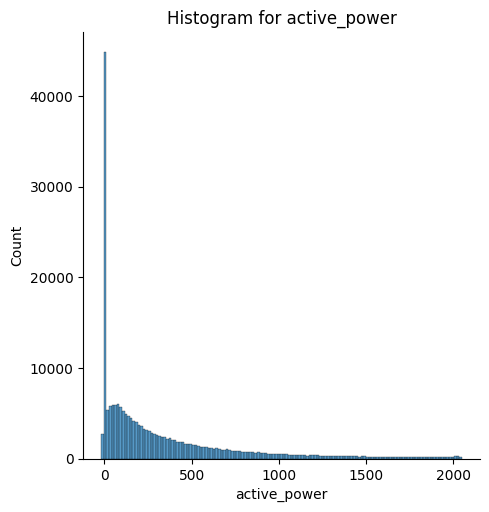

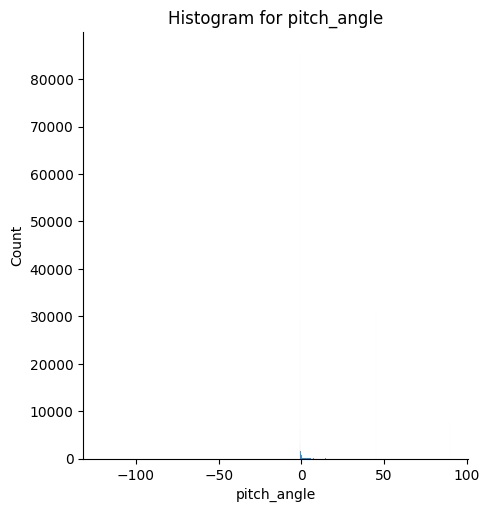

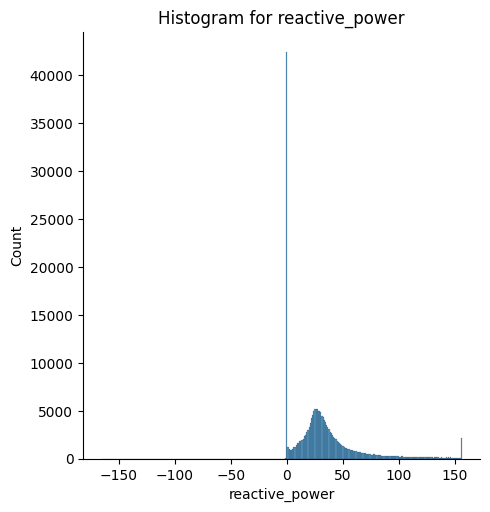

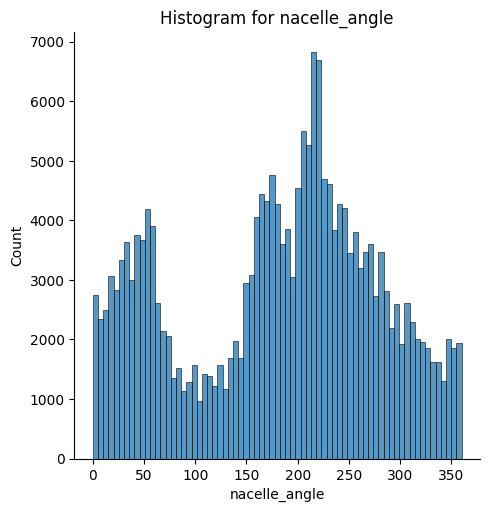

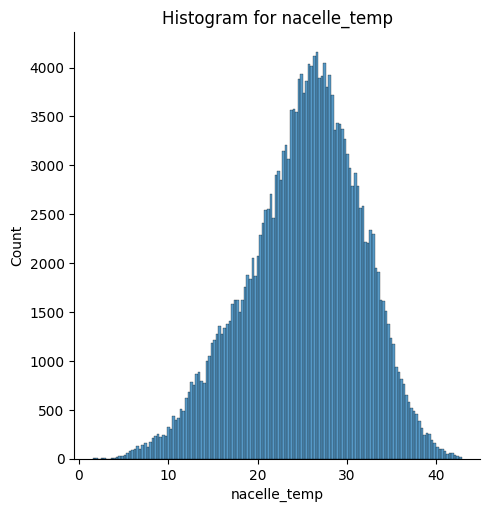

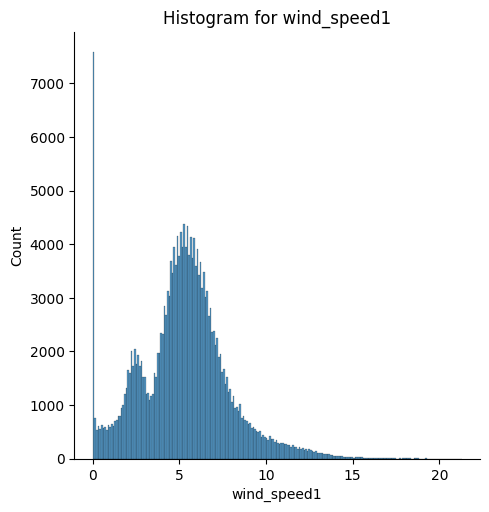

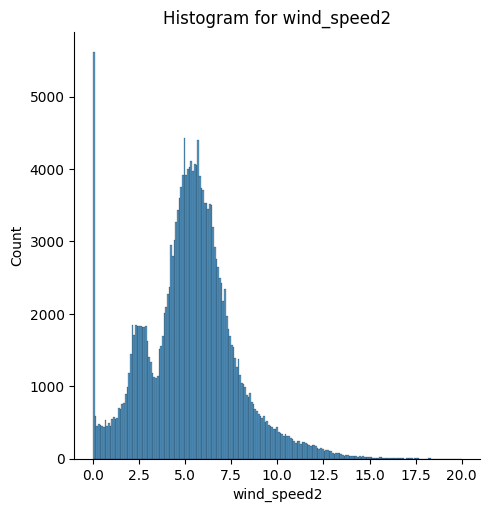

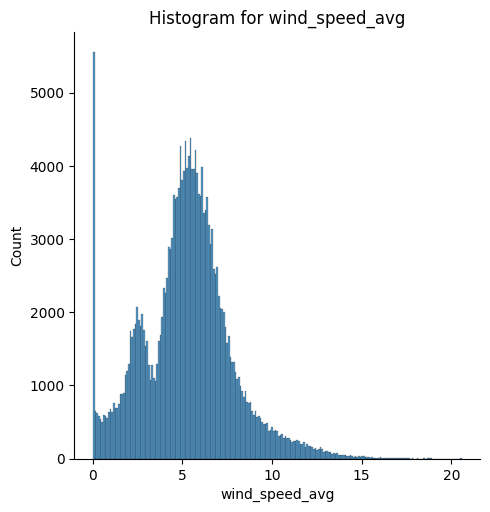

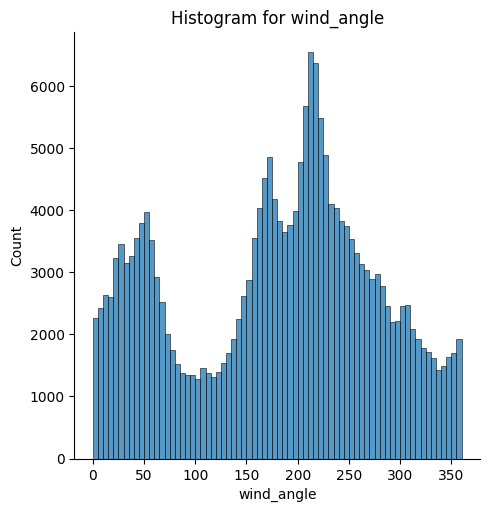

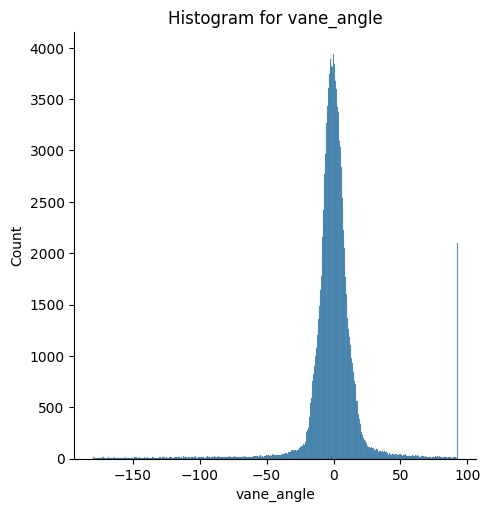

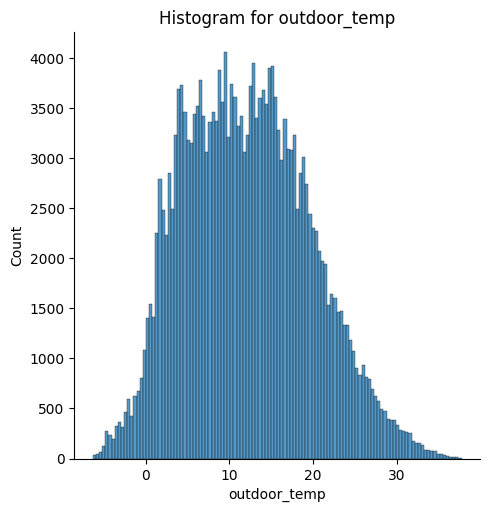

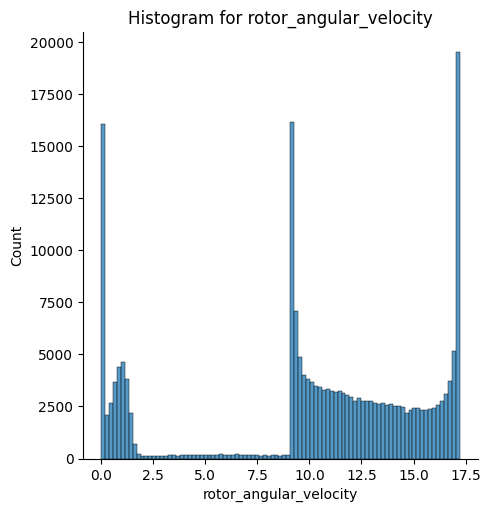

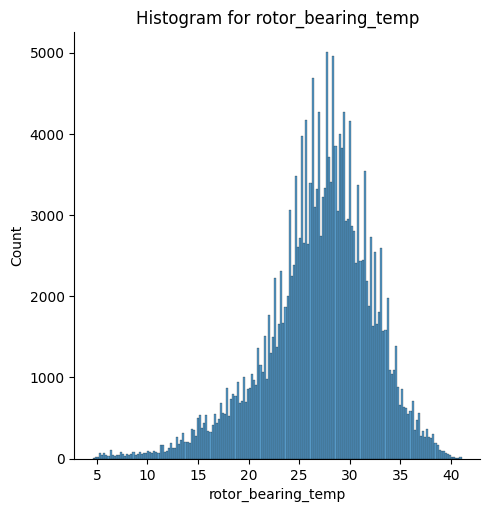

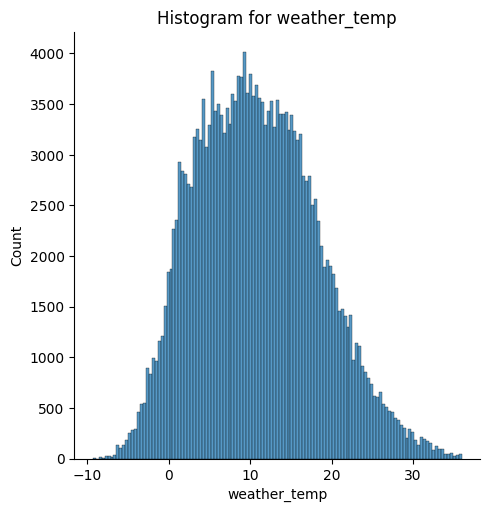

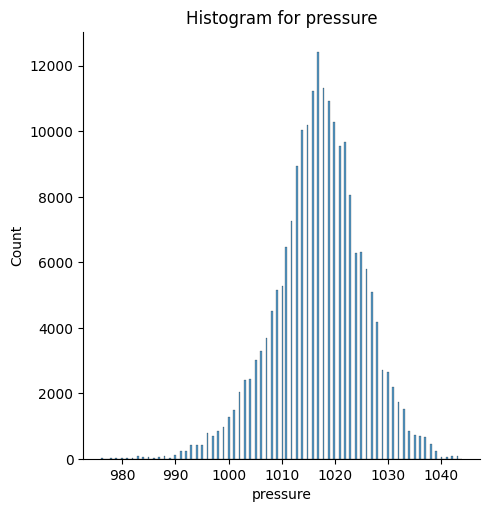

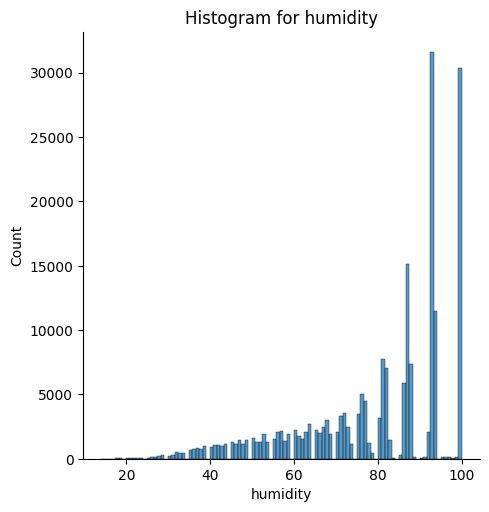

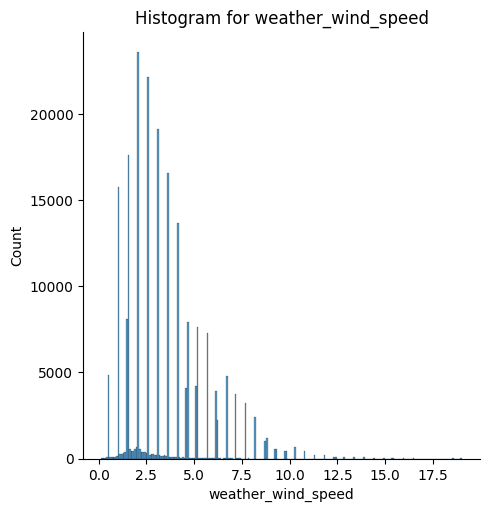

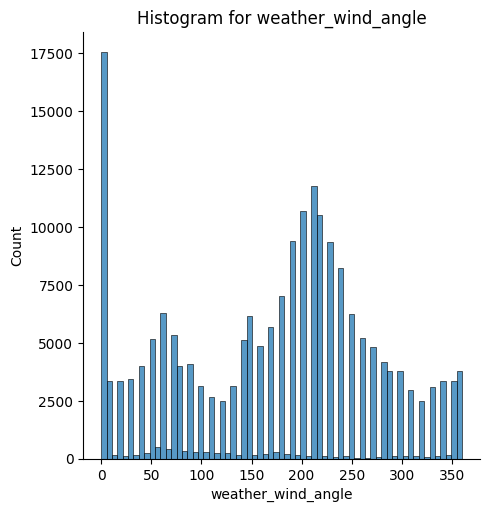

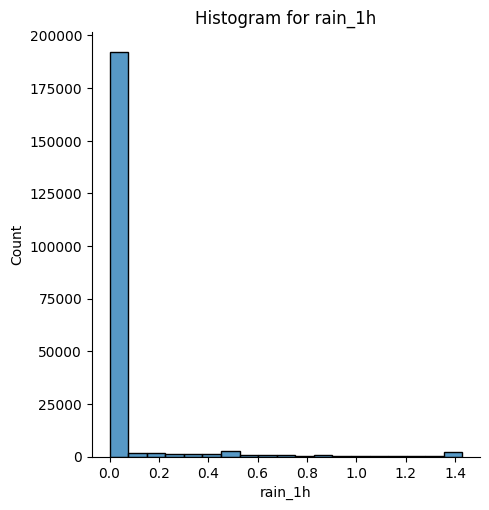

In [8]:
import scipy.stats
from statsmodels.graphics.gofplots import qqplot

# Plot histogram for each continuous feature to see if a transformation is necessary
for feature in ['active_power','pitch_angle','reactive_power','nacelle_angle','nacelle_temp','wind_speed1','wind_speed2','wind_speed_avg','wind_angle','vane_angle','outdoor_temp','rotor_angular_velocity','rotor_bearing_temp','weather_temp','pressure','humidity','weather_wind_speed','weather_wind_angle','rain_1h']:
    sns.displot(wind_DS_clean[feature], kde=False)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

Observations:
1) Data for wind_speed_avg is linear. So no need to apply any transformation.

There are several ways to transform skewed data so that it becomes normally distributed:

-Log transformation: A log transformation can be used to reduce the skewness of data by compressing the range of values. This is particularly useful when the data has a long tail on the right side.

-Square root transformation: A square root transformation can be used to reduce the skewness of data by compressing the range of values. This is particularly useful when the data has a long tail on the right side.

-Box-Cox transformation: The Box-Cox transformation is a family of power transformations that can be used to normalize data. It is particularly useful when the data has a long tail on the right side.

-Reciprocal transformation: A reciprocal transformation can be used to reduce the skewness of data by compressing the range of values. This is particularly useful when the data has a long tail on the left side.

-Yeo-Johnson transformation: The Yeo-Johnson transformation is a modified version of the Box-Cox transformation that can be used with both positive and negative data values.

# Box-Cox Power Transformation


*   Determine what range of exponents to test
*   Apply each transformation to each value of your chosen feature
*   Use some criteria to determine which of the transformations yield the best distribution





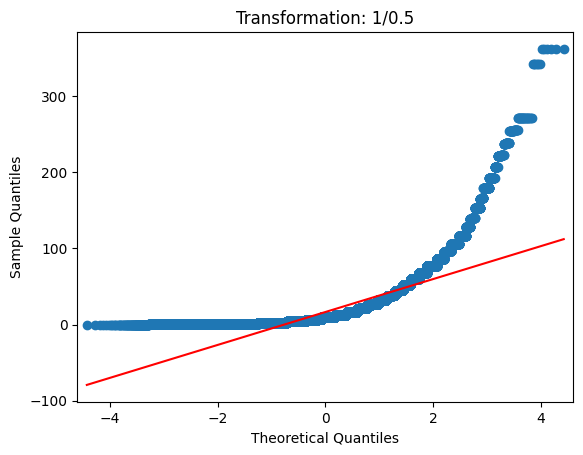

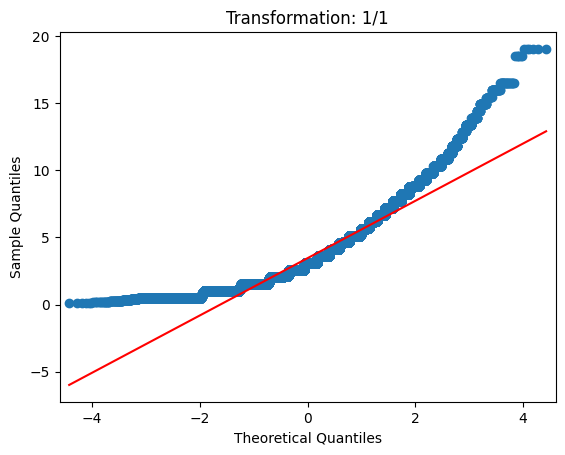

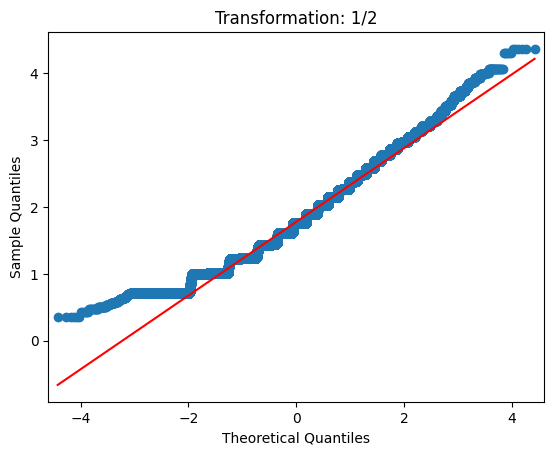

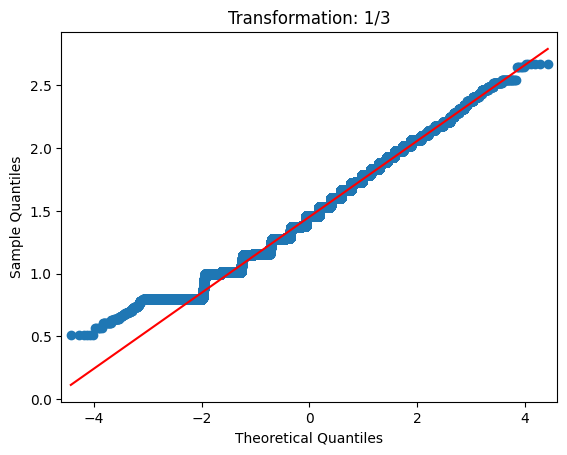

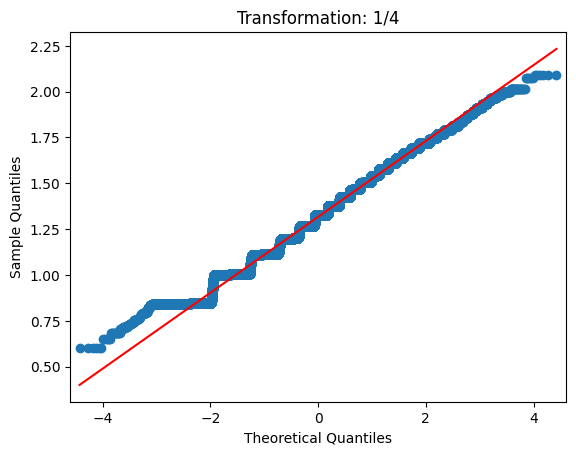

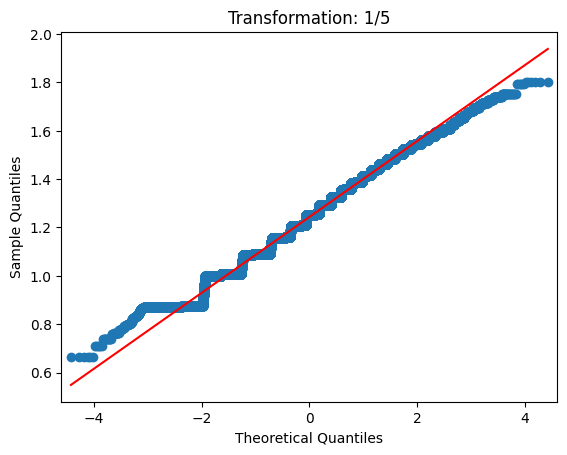

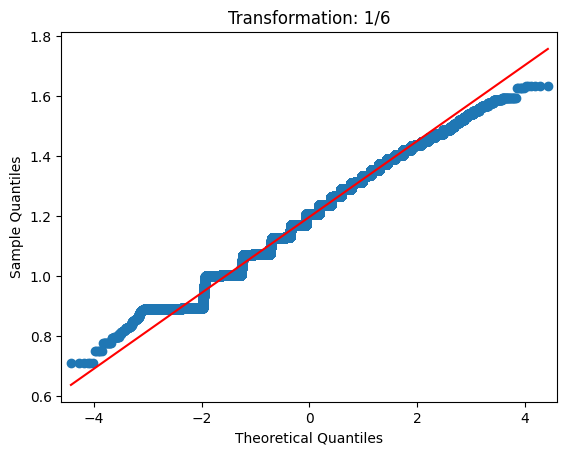

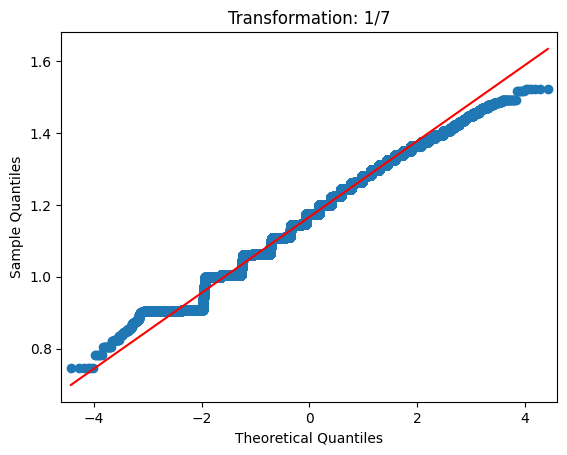

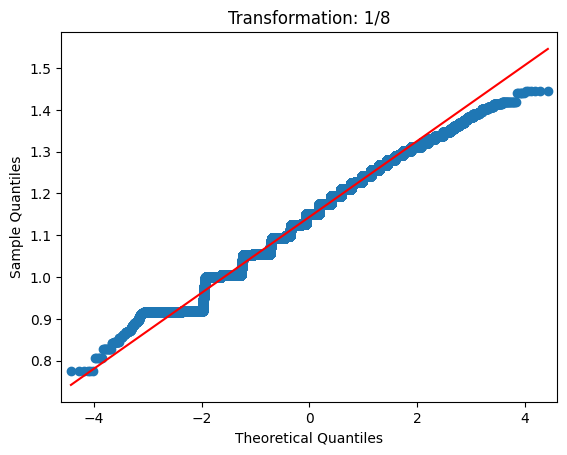

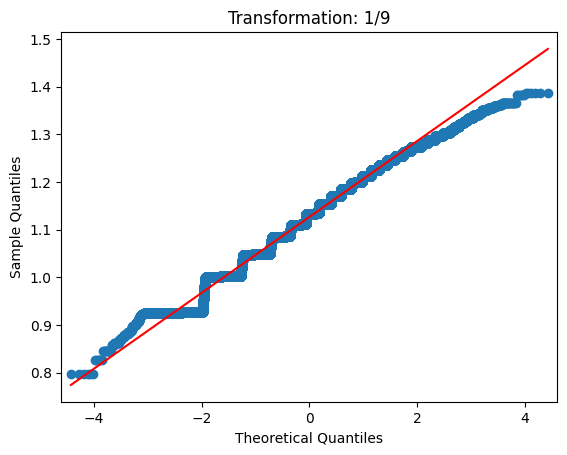

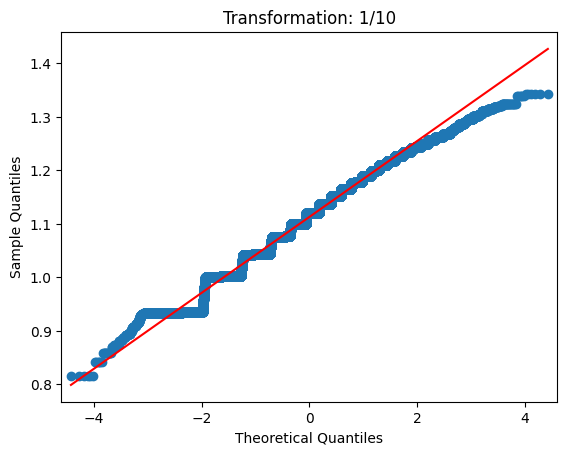

In [70]:
# Generate QQ plots
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = wind_DS_clean['weather_wind_speed']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

Observation: Looking at the above graphs, a transformation of 1/3 looked like a good option for weather_wind_speed.

In [ ]:
#Not used because didnot result in better scores.
# Generate QQ plots
#wind_DS_clean['humidity_tr'] = 1/wind_DS_clean['humidity']
#qqplot(wind_DS_clean['humidity_tr'], line='s')
#plt.title("Reciprocal Transformation")

In [ ]:
#Not used since Box Cox graphs looked better alligned
# Generate QQ plots
#for i in [1, 2, 3, 4, 5]:
#    data_t = wind_DS_clean['weather_wind_speed']
#    log_data = np.log(data_t)
#   qqplot(log_data, line='s')
#    plt.title("Transformation: log{}".format(str(i)))

In [72]:
# Create the new transformed feature
wind_DS_clean['weather_wind_speed_tr'] = wind_DS_clean['weather_wind_speed'].apply(lambda x: x**(1/3))
#wind_DS_clean['active_power_tr'] = np.log(wind_DS_clean['active_power'])
#wind_DS_clean['active_power_tr'] = wind_DS_clean['active_power_tr1'].apply(lambda x: x.real)
wind_DS_clean.head()

,active_power,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,vane_angle,...,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,active_power_tr,active_power_tr1,weather_wind_speed_tr
0,801.22998,-1.0,67.559998,286.00000,20.129999,7.52,7.76,7.64,286.19000,0.16,...,26.049999,5.39,1011.0,75.0,5.66,180.0,0.0,6.686148,6.686148,1.782128
1,943.16998,-1.0,70.260002,286.00000,21.420000,8.18,8.45,8.31,288.32999,2.33,...,26.100000,5.39,1011.0,75.0,5.66,180.0,0.0,6.849247,6.849247,1.782128
2,998.48999,-1.0,75.330002,286.00000,22.049999,8.29,8.66,8.47,293.04001,7.01,...,26.219999,5.39,1011.0,75.0,5.66,180.0,0.0,6.906244,6.906244,1.782128
3,837.96002,-1.0,82.739998,286.00000,22.299999,7.89,8.24,8.06,294.01999,8.05,...,26.309999,5.39,1011.0,75.0,5.66,180.0,0.0,6.730970,6.730970,1.782128
4,871.57001,-1.0,82.349998,294.17999,22.600000,7.86,8.20,8.03,299.22000,4.40,...,26.389999,5.39,1011.0,75.0,5.66,180.0,0.0,6.770296,6.770296,1.782128


## Feature Selection

In [118]:
# Feature Selection with Univariate Statistical Tests

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
#names = ['pitch_angle','reactive_power','nacelle_angle','nacelle_temp','wind_speed1','wind_speed2','wind_speed_avg','wind_angle','vane_angle','outdoor_temp','rotor_angular_velocity','rotor_bearing_temp','weather_temp','pressure','humidity','weather_wind_speed','weather_wind_angle','rain_1h','snow_1h']
dataframe = wind_DS_clean[['pitch_angle','reactive_power','nacelle_angle','nacelle_temp','wind_speed1','wind_speed2','wind_speed_avg','wind_angle','vane_angle','outdoor_temp','rotor_angular_velocity','rotor_bearing_temp','weather_temp','pressure','humidity','weather_wind_speed_tr','weather_wind_angle','rain_1h']]
array = dataframe.values
X = array[:,0:17]
Y = array[:,17]
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print( fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 7.294 34.574 22.708  4.396 29.071 29.742 29.557 23.099  1.787  3.64
 18.617 13.395  4.863 80.637 42.592 35.641 16.228]
[[  67.56  1011.      75.       1.782]
 [  70.26  1011.      75.       1.782]
 [  75.33  1011.      75.       1.782]
 [  82.74  1011.      75.       1.782]
 [  82.35  1011.      75.       1.782]]


Features selected : 'reactive_power_clean','wind_speed_avg','humidity','weather_wind_speed','weather_wind_angle'

Defining feature X and target Y

In [129]:
X = wind_DS_clean[['reactive_power','wind_speed_avg','humidity','weather_wind_speed_tr','weather_wind_angle']]
X = X.rename(columns={'weather_wind_speed_tr': 'weather_wind_speed'})
#X = X.rename(columns={'humidity_tr': 'humidity'})
y = wind_DS_clean['active_power']

Dividing data into training and vaidation data set

In [130]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 100)

Implementing the linear regression

In [131]:
wind_lr = LinearRegression()
wind_lr.fit(train_X,train_y)

LinearRegression()

In [132]:
#Prediction of test set
#Reading test data file
test_data = pd.read_csv('/content/drive/MyDrive/test_data.csv')
#Taking only a subset of columns for test data in the dataframe
test_data_X = test_data[['reactive_power','wind_speed_avg','humidity','weather_wind_speed','weather_wind_angle']]
#Predicting the actual_power for the test data set
y_test_data_predict = wind_lr.predict(test_data_X)
#Predicted values for the test data set
print("Prediction of test set: {}".format(y_test_data_predict))

Prediction of test set: [-71.463 -48.777 -66.513 ... 199.917 168.04  -19.288]


In [133]:
y_predict = wind_lr.predict(test_X)
#Predicted values for the test data set
print("Prediction of test set: {}".format(y_predict))
wind_lr_dif = pd.DataFrame({"Actual value":test_y, "Predicted value":y_predict})
wind_lr_dif.head()

Prediction of test set: [ 312.263 1610.03   204.911 ... -106.963 -248.381  424.398]


,Actual value,Predicted value
186813,188.280000,312.262570
45433,1790.060100,1610.030497
64742,97.010002,204.911093
151113,156.500000,182.521294
24054,0.000000,-132.002029


In [134]:
meanAbErr = metrics.mean_absolute_error(test_y, y_predict)
meanSqErr = metrics.mean_squared_error(test_y, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(test_y, y_predict))
print('R squared: {:.2f}'.format(wind_lr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 86.37
Mean Absolute Error: 128.2133778818903
Mean Square Error: 24817.60612313653
Root Mean Square Error: 157.53604705951122


Implementing Random Forest

In [135]:
wind_RF= RandomForestRegressor(n_estimators=100, random_state=0)
wind_RF.fit(X,y)

RandomForestRegressor(random_state=0)

In [136]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 100)
y_predict = wind_RF.predict(test_X)
meanAbErr = metrics.mean_absolute_error(test_y, y_predict)
meanSqErr = metrics.mean_squared_error(test_y, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(test_y, y_predict))
print('R squared: {:.2f}'.format(wind_lr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
wind_RF.score(X,y)

R squared: 86.37
Mean Absolute Error: 8.29519878004225
Mean Square Error: 213.90338135763733
Root Mean Square Error: 14.625436108288783


0.9988551444525228

In [137]:
#Predicted values for the test data set
print("Prediction of test set: {}".format(y_predict))
wind_regr_dif = pd.DataFrame({"Actual value":test_y, "Predicted value":y_predict})
wind_regr_dif.head()

Prediction of test set: [ 2.111e+02  1.803e+03  9.929e+01 ... -8.934e-01 -6.105e-01  4.161e+02]


,Actual value,Predicted value
186813,188.280000,211.087100
45433,1790.060100,1802.593862
64742,97.010002,99.287101
151113,156.500000,158.388100
24054,0.000000,-0.046700


In [138]:
#Prediction of test set
#Reading test data file
test_data = pd.read_csv('/content/drive/MyDrive/test_data.csv')
#Taking only a subset of columns for test data in the dataframe
#test_data_X = test_data[['pitch_angle','reactive_power','nacelle_temp','wind_speed_avg','rotor_angular_velocity']]
test_data_X = test_data[['reactive_power','wind_speed_avg','humidity','weather_wind_speed','weather_wind_angle']]
#Predicting the actual_power for the test data set
y_test_data_predict = wind_RF.predict(test_data_X)
#Predicted values for the test data set
print("Prediction of test set: {}".format(y_test_data_predict))

Prediction of test set: [ 2.539  4.157 -3.184 ... -2.297 -0.359 -0.162]


In [140]:
submission_MX = pd.DataFrame(data=y_test_data_predict, columns=["active_power"])
submission_MX.reset_index(inplace=True)
submission_MX = submission_MX.rename(columns = {'index':'id'})
submission_MX.head()

,id,active_power
0,0,2.5387
1,1,4.1567
2,2,-3.1837
3,3,-1.5606
4,4,6.5170


In [141]:
submission_MX.to_csv("active_power_submission_remSkewWeatherWind.csv", index=False)